시계열 데이터 분석
  - 분해법
    - 추세(Trend), 계절성(Seasonality), 주기(Cycle) 및 불규칙성(Irregularity) 와 같은 구성요소를 분해해서 분석
  - 시간 영역 분석법
    - AR(Auto Regressive Model) 모형
    - MA(Moving Average) 모형
    - ARMA 모형
    - ARIMA(Autoregressive Integrated Moveing Average)

시계열 데이터 전처리 방법
  - to_datetime()을 이용하여 datetime 형 변환

In [ ]:
import pandas as pd
d = pd.DataFrame({
    'date':['2023-01-01','2023-02-01','2023-03-01'],
    'name':['A','B','C']
})
d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [ ]:
d['date'] = pd.to_datetime(d['date'],format='%Y-%m-%d')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


시계열 정보를 index로 설정한다.

In [ ]:
d = d.set_index(keys='date')
d

,name
date,
2023-01-01,A
2023-02-01,B
2023-03-01,C


시계열 데이터의 결측치 처리
  - 가장 최근의 값으로 결측치 채우기

In [ ]:
d = d.fillna(method='ffill')
d

,name
date,
2023-01-01,A
2023-02-01,B
2023-03-01,C


In [ ]:
import numpy as np
d = pd.DataFrame({
    'date':['2023-01-01','2023-02-01','2023-03-01','2023-04-01','2023-05-01'],
    'x':[0.1,2.0,np.nan,1.2,2.2]
})
d.info()
# 날자를 datetime로 변경하고
d['date'] = pd.to_datetime(d['date'])
# 날자를 index로 셋팅하고
d = d.set_index(keys='date')
# 널 확인하고
print(d.isnull().sum())
# 널은 가장 최근 값으로 대처
d = d.fillna(method='ffill')
d

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5 non-null      object 
 1   x       4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes
x    1
dtype: int64


,x
date,
2023-01-01,0.1
2023-02-01,2.0
2023-03-01,2.0
2023-04-01,1.2
2023-05-01,2.2


In [ ]:
# 결측치 전후의 값의평균으로 결측값을 채우기
# interpolate()
d = pd.DataFrame({
    'date':['2023-01-01','2023-02-01','2023-03-01','2023-04-01','2023-05-01'],
    'x':[0.1,2.0,np.nan,1.2,2.2]
})
d.interpolate()

,date,x
0,2023-01-01,0.1
1,2023-02-01,2.0
2,2023-03-01,1.6
3,2023-04-01,1.2
4,2023-05-01,2.2


결측치 처리
  - 제거
  - 평균(전체)
  - 앞뒤의 평균 interpolate()
  - 범주형(최빈값)
  - 시계열
    - 가장최근의 값 ffill

In [13]:
import numpy as np
import pandas as pd
d = pd.DataFrame({
    'date' : ['2019-01-03','2021-11-22','2021-12-01','2023-01-05'],
    'x' : [0.1,0.2,0.3,0.4]
})
d['date'] = pd.to_datetime(d['date'])
d = d.set_index(keys=['date'])
d

,x
date,
2019-01-03,0.1
2021-11-22,0.2
2021-12-01,0.3
2023-01-05,0.4


빈도설정

In [14]:
d2 = d.asfreq('Y',method='ffill') # 'Y' 매년 마지막 일
d2

,x
date,
2019-12-31,0.1
2020-12-31,0.1
2021-12-31,0.3
2022-12-31,0.3


In [ ]:
help(d.asfreq)

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

rolling(shift횟수).통계함수

In [28]:
d = pd.DataFrame({
    'date' : ['2023-01-01','2023-01-15','2023-01-20','2023-02-05'],
    'x' : [0.1,0.2,0.3,0.4]
})
d['date'] = pd.to_datetime(d['date'])
d = d.set_index(keys=['date'])
print("원본 : ",d)
print('=='*20)
temp = d.rolling(2).sum()
print(temp)

print('=='*20)
temp = d.rolling(3).mean()
print(temp)

원본 :                x
date           
2023-01-01  0.1
2023-01-15  0.2
2023-01-20  0.3
2023-02-05  0.4
              x
date           
2023-01-01  NaN
2023-01-15  0.3
2023-01-20  0.5
2023-02-05  0.7
              x
date           
2023-01-01  NaN
2023-01-15  NaN
2023-01-20  0.2
2023-02-05  0.3


이전값과 차이 계산
  - diff()함수 사용

In [30]:
d = pd.DataFrame({
    'date' : ['2023-01-01','2023-01-15','2023-01-20','2023-02-05','2023-03-05'],
    'x' : [5,4,3,2,7]
})
d['date'] = pd.to_datetime(d['date'])
d = d.set_index(keys=['date'])
print('원본 : ',d)
print("=="*20)
# 이전값 - 이후값
y_diff = d.diff()
d['diff'] = y_diff
print(d)

원본 :              x
date         
2023-01-01  5
2023-01-15  4
2023-01-20  3
2023-02-05  2
2023-03-05  7
            x  diff
date               
2023-01-01  5   NaN
2023-01-15  4  -1.0
2023-01-20  3  -1.0
2023-02-05  2  -1.0
2023-03-05  7   5.0


지연값 추출
  - shift() 사용

In [33]:
d = pd.DataFrame({
    'date' : ['2023-01-01','2023-01-15','2023-01-20','2023-02-05','2023-03-05'],
    'x' : [5,4,3,2,7]
})
d['date'] = pd.to_datetime(d['date'])
d = d.set_index(keys=['date'])
print('원본 : ',d)
print("=="*20)
d['shift'] = d['x'].shift(2)
print(d)
print("=="*20)
d = d.fillna(method='bfill')
print(d)

원본 :              x
date         
2023-01-01  5
2023-01-15  4
2023-01-20  3
2023-02-05  2
2023-03-05  7
            x  shift
date                
2023-01-01  5    NaN
2023-01-15  4    NaN
2023-01-20  3    5.0
2023-02-05  2    4.0
2023-03-05  7    3.0
            x  shift
date                
2023-01-01  5    5.0
2023-01-15  4    5.0
2023-01-20  3    5.0
2023-02-05  2    4.0
2023-03-05  7    3.0


원 핫 인코딩
  - get_dummies() 함수를 사용

In [37]:
df = pd.DataFrame({
    'color':['red','green','blue','orange']
})
print('origin : ',df)
one_hot = pd.get_dummies(df['color'])
print('=='*20)
print(one_hot)

origin :      color
0     red
1   green
2    blue
3  orange
   blue  green  orange  red
0     0      0       0    1
1     0      1       0    0
2     1      0       0    0
3     0      0       1    0


시계열 데이터 처리 실습

In [38]:
!pip install finance-DataReader

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [43]:
# 2022년도부터 애플 주식 데이터를 불러온다
df =  fdr.DataReader('AAPL','2022')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434296,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144287,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510941,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679474,86709100
...,...,...,...,...,...,...
2023-08-03,191.570007,192.369995,190.690002,191.169998,191.169998,61235200
2023-08-04,185.520004,187.380005,181.919998,181.990005,181.990005,115799700
2023-08-07,182.130005,183.130005,177.350006,178.850006,178.850006,97576100


미국주식 가져오기

In [44]:
df = fdr.StockListing('NASDAQ')
df

100%|██████████| 4204/4204 [00:26<00:00, 156.66it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,전화 및 소형 장치,57106020
1,MSFT,Microsoft Corp,소프트웨어,57201020
2,AMZN,Amazon.com Inc,백화점,53402010
3,NVDA,NVIDIA Corp,반도체,57101010
4,GOOGL,Alphabet Inc Class A,온라인 서비스,57201030
...,...,...,...,...
4199,OAKUR,Oak Woods Acquisition Rights Exp 3 March 2028,투자 지주 회사,55601010
4200,GODNR,Golden Star Acquisition Rights Exp 1 May 2028,투자 지주 회사,55601010
4201,FXCOR,Financial Strategies Acquisition Rights Class A,투자 지주 회사,55601010
4202,ESHAR,ESH Acquisition Rights Exp 13 June 2028,투자 지주 회사,55601010


국내주식

In [45]:
df = fdr.StockListing('KRX')
df

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,68000,2,-900,-1.31,68300,68500,67800,10227311,695338333628,405945213400000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,556000,1,3000,0.54,549000,560000,543000,344272,190480536000,130104000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,118500,3,0,0.00,117400,118500,115100,2622604,306466245506,86268280252500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,802000,1,4000,0.50,791000,802000,790000,40482,32306551000,57081548000000,71174000,STK
4,005490,KR7005490008,POSCO홀딩스,KOSPI,,598000,1,1000,0.17,590000,611000,589000,1034234,620495599000,50573595540000,84571230,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,318660,KR7318660008,타임기술,KONEX,일반기업부,1436,0,0,0.00,0,0,0,0,0,3090417036,2152101,KNX
2741,288490,KR7288490006,나라소프트,KONEX,일반기업부,69,1,2,2.99,63,72,62,184782,12365998,2632143000,38147000,KNX
2742,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1598,2,-1,-0.06,1598,1598,1598,1,1598,2524776080,1579960,KNX
2743,322190,KR7322190000,베른,KONEX,일반기업부,155,2,-4,-2.52,178,178,136,136,21066,1383405535,8925197,KNX


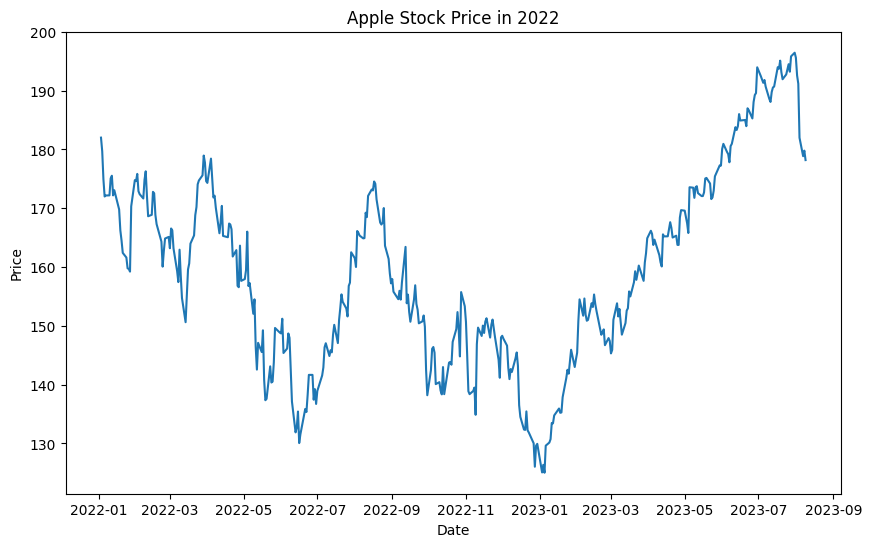

In [46]:
df =  fdr.DataReader('AAPL','2022')
plt.figure(figsize=(10,6))
sns.lineplot(x=df.index,y=df['Close'])
plt.title('Apple Stock Price in 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

resample()을 이용해서 다운샘플링

In [ ]:
df_month = df.resample('BM').mean()
df_month

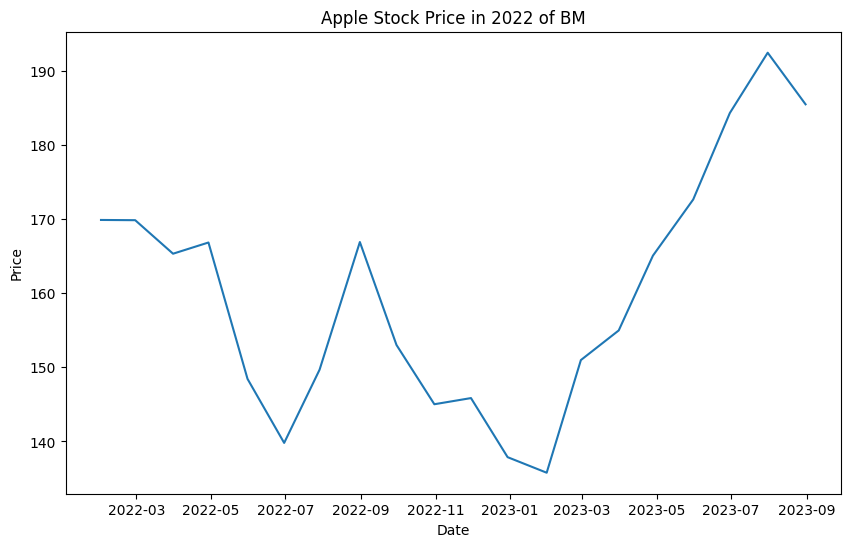

In [48]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df_month.index,y=df_month['Close'])
plt.title('Apple Stock Price in 2022 of BM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

pct_change()를 이용하여 수익률 계산
  - 주어진 기간내의 변화율(퍼센트 변화율)을 계산
  - 시계열 데이터의 변동성을 분석하거나 추세를 파악하는데 활용

In [49]:
df_month['rtn'] =  df_month['Close'].pct_change()
df_month

,Open,High,Low,Close,Adj Close,Volume,rtn
Date,,,,,,,
2022-01-31,170.201500,172.447999,167.639500,169.861500,168.390971,1.054223e+08,NaN
2022-02-28,169.635262,171.585263,167.580524,169.830001,168.539459,8.565875e+07,-0.000185
2022-03-31,164.806956,167.164348,162.939131,165.310435,164.088096,9.481740e+07,-0.026612
2022-04-29,167.479001,169.518500,165.083002,166.820999,165.587493,8.438978e+07,0.009138
2022-05-31,148.324286,150.950952,145.364284,148.430477,147.504966,1.143353e+08,-0.110241
2022-06-30,139.945714,141.919047,138.111430,139.798573,138.968760,8.329047e+07,-0.058155
2022-07-29,148.436499,150.766000,147.141500,149.670499,148.782088,7.235627e+07,0.070615
2022-08-31,166.956522,168.589566,165.533913,166.885218,166.085828,6.566259e+07,0.115017
2022-09-30,153.284286,155.308573,150.893333,153.002856,152.305928,9.927251e+07,-0.083185


수익률 시각화

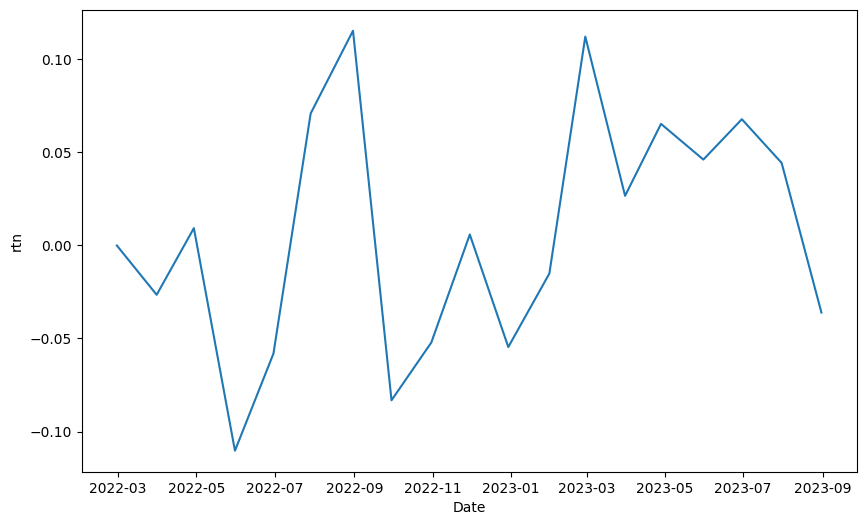

In [50]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df_month.index, y=df_month['rtn'])
plt.show()

주가흐름 판단

In [51]:
# 2달씩 종가로 이동평균 구하기
df_month['NA'] = df_month['Close'].rolling(2).mean()
df_month

,Open,High,Low,Close,Adj Close,Volume,rtn,NA
Date,,,,,,,,
2022-01-31,170.201500,172.447999,167.639500,169.861500,168.390971,1.054223e+08,NaN,NaN
2022-02-28,169.635262,171.585263,167.580524,169.830001,168.539459,8.565875e+07,-0.000185,169.845750
2022-03-31,164.806956,167.164348,162.939131,165.310435,164.088096,9.481740e+07,-0.026612,167.570218
2022-04-29,167.479001,169.518500,165.083002,166.820999,165.587493,8.438978e+07,0.009138,166.065717
2022-05-31,148.324286,150.950952,145.364284,148.430477,147.504966,1.143353e+08,-0.110241,157.625738
2022-06-30,139.945714,141.919047,138.111430,139.798573,138.968760,8.329047e+07,-0.058155,144.114525
2022-07-29,148.436499,150.766000,147.141500,149.670499,148.782088,7.235627e+07,0.070615,144.734536
2022-08-31,166.956522,168.589566,165.533913,166.885218,166.085828,6.566259e+07,0.115017,158.277859
2022-09-30,153.284286,155.308573,150.893333,153.002856,152.305928,9.927251e+07,-0.083185,159.944037


<Axes: xlabel='Date'>

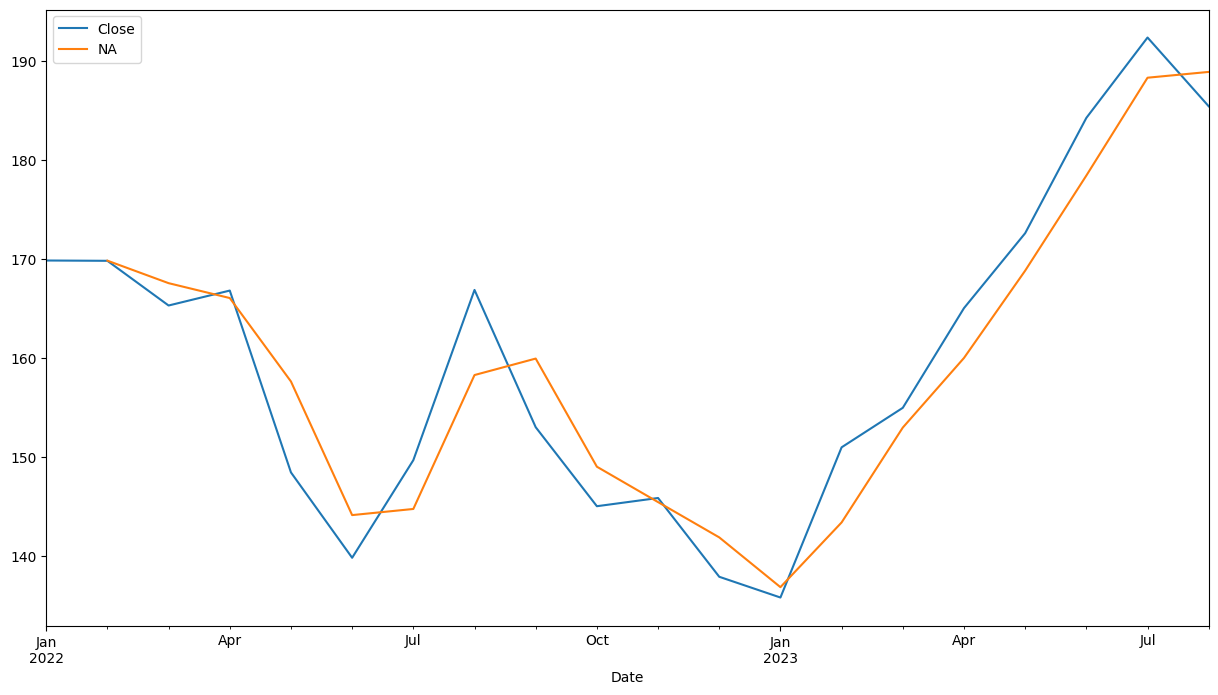

In [53]:
#이동평균을 종가와 함께 시각화
df_month.loc[:, ['Close','NA']].plot(figsize=(15,8))

In [54]:
# 이동평균의 window사이즈를 3으로 한 평균 = NA2로 구한다음  Close, NA, NA2 시각화